**Set environment**

In [1]:
suppressMessages(suppressWarnings(source("../config/config_sing.R")))
suppressMessages(suppressWarnings(source("../config/config_func.R")))
show_env()

You are in Singularity: singularity_proj_encode_fcc 
BASE DIRECTORY (FD_BASE): /data/reddylab/Kuei 
WORK DIRECTORY (FD_WORK): /data/reddylab/Kuei/out 
CODE DIRECTORY (FD_CODE): /data/reddylab/Kuei/code 
PATH OF PROJECT (FD_PRJ): /data/reddylab/Kuei/code/Proj_CombEffect_ENCODE_FCC 
PATH OF RESULTS (FD_RES): /data/reddylab/Kuei/out/proj_combeffect_encode_fcc 
PATH OF LOG     (FD_LOG): /data/reddylab/Kuei/out/proj_combeffect_encode_fcc/log 


In [2]:
VEC_TXT_PREFIX_LOOP = c("Loop_A", "Loop_B")

FOLDR = "hic_intact_deep"

In [3]:
fdiry = file.path(FD_RES, "results", "region", "KS91_K562_ASTARRseq_peak_macs_input", FOLDR)
dir(fdiry)

[1] "peak.annotation.hic_intact.deep.Loop_A.bed.gz"
[2] "peak.annotation.hic_intact.deep.Loop_B.bed.gz"
[3] "peak.closest.hic_intact.deep.Loop_A.bed.gz"   
[4] "peak.closest.hic_intact.deep.Loop_B.bed.gz"

In [4]:
fpath = "/data/reddylab/Kuei/out/proj_combeffect_encode_fcc/results/region/hic_intact_deep/hic_intact.deep.Loop_A.bed.gz"
dat = read_tsv(fpath, col_names=FALSE, show_col_types = FALSE)
head(dat)

X1,X2,X3
<chr>,<dbl>,<dbl>
chr1,778000,779000
chr1,868000,870000
chr1,870000,872000
chr1,870000,875000
chr1,904000,905000
chr1,904000,906000


In [9]:
fdiry = file.path(FD_RES, "results", "region", "KS91_K562_ASTARRseq_peak_macs_input", FOLDR)
fname = "peak.annotation.hic_intact.deep.Loop_A.bed.gz"
fpath = file.path(fdiry, fname)
print(fpath)
cnames = c("Chrom", "Start", "End")
cnames = c(
    paste(cnames, "ATAC", sep="_"),
    paste(cnames, "Loop", sep="_"),
    "Overlap"
)
#cnames = c("Chrom_ATAC", "Start_ATAC", "End_ATAC", cnames, "Distance")
print(cnames)

dat = read_tsv(fpath, col_names = cnames)
head(dat)

[1] "/data/reddylab/Kuei/out/proj_combeffect_encode_fcc/results/region/KS91_K562_ASTARRseq_peak_macs_input/hic_intact_deep/peak.annotation.hic_intact.deep.Loop_A.bed.gz"
[1] "Chrom_ATAC" "Start_ATAC" "End_ATAC"   "Chrom_Loop" "Start_Loop"
[6] "End_Loop"   "Overlap"   


Rows: 72207 Columns: 7
── Column specification ────────────────────────────────────────────────────
Delimiter: "\t"
chr (2): Chrom_ATAC, Chrom_Loop
dbl (5): Start_ATAC, End_ATAC, Start_Loop, End_Loop, Overlap

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Chrom_ATAC,Start_ATAC,End_ATAC,Chrom_Loop,Start_Loop,End_Loop,Overlap
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>
chr1,777949,779437,chr1,778000,779000,1000
chr1,869623,870250,chr1,870000,872000,250
chr1,869623,870250,chr1,870000,875000,250
chr1,869623,870250,chr1,868000,870000,377
chr1,873248,873781,chr1,870000,875000,533
chr1,903633,905556,chr1,904000,905000,1000


In [10]:
fdiry = file.path(FD_RES, "results", "region", "KS91_K562_ASTARRseq_peak_macs_input", FOLDR)
fname = "peak.annotation.hic_intact.deep.Loop_A.bed.gz"
fpath = file.path(fdiry, fname)

cnames = c("Chrom", "Start", "End")
cnames = c(
    paste(cnames, "ATAC", sep="_"),
    paste(cnames, "Loop", sep="_"),
    "Overlap"
)
print(cnames)

dat = read_tsv(fpath, col_names=cnames, col_types="ciiciici", show_col_types = FALSE)
head(dat)

[1] "Chrom_ATAC" "Start_ATAC" "End_ATAC"   "Chrom_Loop" "Start_Loop"
[6] "End_Loop"   "Overlap"   


Chrom_ATAC,Start_ATAC,End_ATAC,Chrom_Loop,Start_Loop,End_Loop,Overlap
<chr>,<int>,<int>,<chr>,<int>,<int>,<chr>
chr1,777949,779437,chr1,778000,779000,1000
chr1,869623,870250,chr1,870000,872000,250
chr1,869623,870250,chr1,870000,875000,250
chr1,869623,870250,chr1,868000,870000,377
chr1,873248,873781,chr1,870000,875000,533
chr1,903633,905556,chr1,904000,905000,1000


In [12]:
fdiry = file.path(FD_RES, "results", "region", "KS91_K562_ASTARRseq_peak_macs_input", FOLDR)

vec = VEC_TXT_PREFIX_LOOP
names(vec) = vec

lst = lapply(vec, function(txt_prefix_loop){
    ###
    cnames = c("Chrom_Loop", "Start_Loop", "End_Loop")
    cnames = c("Chrom_ATAC", "Start_ATAC", "End_ATAC", cnames, "Overlap")
    
    ###
    fdiry = file.path(FD_RES, "results", "region", "KS91_K562_ASTARRseq_peak_macs_input", FOLDR)
    fname = paste("peak.annotation.hic_intact", "deep", txt_prefix_loop, "bed.gz", sep=".")
    fpath = file.path(fdiry, fname)
    
    ###
    dat = read_tsv(fpath, col_names=cnames, show_col_types = FALSE)
    dat = dat %>% dplyr::mutate(
        Name_ATAC  = paste0(Chrom_ATAC, ":", Start_ATAC, "-", End_ATAC),
        Name_Loop  = paste0(Chrom_Loop, ":", Start_Loop, "-", End_Loop),
        Label_Loop = txt_prefix_loop
    )
    dat = dat %>% dplyr::select(
        Chrom_ATAC, Start_ATAC, End_ATAC, Name_ATAC,
        Chrom_Loop, Start_Loop, End_Loop, Name_Loop,
        Overlap
    )
    return(dat)
})

lst_dat_peak_loop_hic_intact = lst
print(names(lst))
for (dat in lst){
    cat("\n")
    print(head(dat))
}

[1] "Loop_A" "Loop_B"

# A tibble: 6 × 9
  Chrom_ATAC Start_ATAC End_ATAC Name_ATAC        Chrom_Loop Start_Loop End_Loop
  <chr>           <dbl>    <dbl> <chr>            <chr>           <dbl>    <dbl>
1 chr1           777949   779437 chr1:777949-779… chr1           778000   779000
2 chr1           869623   870250 chr1:869623-870… chr1           870000   872000
3 chr1           869623   870250 chr1:869623-870… chr1           870000   875000
4 chr1           869623   870250 chr1:869623-870… chr1           868000   870000
5 chr1           873248   873781 chr1:873248-873… chr1           870000   875000
6 chr1           903633   905556 chr1:903633-905… chr1           904000   905000
# ℹ 2 more variables: Name_Loop <chr>, Overlap <dbl>

# A tibble: 6 × 9
  Chrom_ATAC Start_ATAC End_ATAC Name_ATAC        Chrom_Loop Start_Loop End_Loop
  <chr>           <dbl>    <dbl> <chr>            <chr>           <dbl>    <dbl>
1 chr1           826754   828040 chr1:826754-828… chr1           827000   828

In [14]:
fun_display_table(head(lst[[1]]))

Chrom_ATAC,Start_ATAC,End_ATAC,Name_ATAC,Chrom_Loop,Start_Loop,End_Loop,Name_Loop,Overlap
chr1,777949,779437,chr1:777949-779437,chr1,778000,779000,chr1:778000-779000,1000
chr1,869623,870250,chr1:869623-870250,chr1,870000,872000,chr1:870000-872000,250
chr1,869623,870250,chr1:869623-870250,chr1,870000,875000,chr1:870000-875000,250
chr1,869623,870250,chr1:869623-870250,chr1,868000,870000,chr1:868000-870000,377
chr1,873248,873781,chr1:873248-873781,chr1,870000,875000,chr1:870000-875000,533
chr1,903633,905556,chr1:903633-905556,chr1,904000,905000,chr1:904000-905000,1000


In [24]:
lst = lst_dat_hic_intact 
dat = bind_rows(lst, .id = "Loop_Anchor")
dat = dat %>% 
    dplyr::select(Name_ATAC, Name_Loop, Overlap, Loop_Anchor) %>%
    dplyr::rename(
        "Peak" = "Name_ATAC",
        "Loop" = "Name_Loop"
    ) %>%
    dplyr::distinct()

### assign and show
dat_hic_intact = dat
print(dim(dat))
head(dat)

[1] 143662      4


Peak,Loop,Overlap,Loop_Anchor
<chr>,<chr>,<dbl>,<chr>
chr1:777949-779437,chr1:778000-779000,1000,Loop_A
chr1:869623-870250,chr1:870000-872000,250,Loop_A
chr1:869623-870250,chr1:870000-875000,250,Loop_A
chr1:869623-870250,chr1:868000-870000,377,Loop_A
chr1:873248-873781,chr1:870000-875000,533,Loop_A
chr1:903633-905556,chr1:904000-905000,1000,Loop_A


In [25]:
fdiry = file.path(FD_RES, "results", "region", "KS91_K562_ASTARRseq_peak_macs_input", "summary")
fname = "peak.summary.hic_intact.deep.overlap.tsv"
fpath = file.path(fdiry, fname)

dat = dat_hic_intact
write_tsv(dat, fpath)

In [94]:
fdiry = file.path(FD_RES, "results", "region", "KS91_K562_ASTARRseq_peak_macs_input")
fname = "KS91_K562_hg38_ASTARRseq_Input.all_reps.masked.union_narrowPeak.q5.bed.gz"
fpath = file.path(fdiry, fname)

dat = read_tsv(fpath, show_col_types = FALSE)

dat_peak = dat
print(dim(dat))
head(dat)

[1] 247519      3


chr1,10015,10442
<chr>,<dbl>,<dbl>
chr1,14253,14645
chr1,16015,16477
chr1,17237,17772
chr1,28903,29613
chr1,30803,31072
chr1,101603,101849


In [22]:
fdiry = file.path(FD_RES, "results", "region", "KS91_K562_ASTARRseq_peak_macs_input", "summary")
fname = "peak.summary.tss_pol2.tsv"
fpath = file.path(fdiry, fname)

dat = read_tsv(fpath, show_col_types = FALSE)

dat_peak_annot_tss = dat
print(dim(dat))
head(dat)

[1] 15191     7


Peak,Annotation,Label,Count,Region,Score,Note
<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<chr>
chr1:17237-17772,TSS_POL2,TSS,4,chr1:17436-17437|chr1:17436-17437|chr1:17436-17437|chr1:17436-17437,9.43812000,MIR6859-1|MIR6859-2|MIR6859-3|MIR6859-4
chr1:28903-29613,TSS_POL2,TSS,1,chr1:29370-29371,0.00023000,WASH7P
chr1:777949-779437,TSS_POL2,TSS,1,chr1:778634-778635,230.56100000,LOC100288069
chr1:816774-817547,TSS_POL2,TSS,1,chr1:817370-817371,1.06609000,FAM87B
chr1:826754-828040,TSS_POL2,TSS,2,chr1:827522-827523|chr1:827590-827591,64.46295000,LINC00115|LINC01128
chr1:876474-878030,TSS_POL2,TSS,1,chr1:876802-876803,0.00788399,FAM41C


In [33]:
lst = lst_dat_hic_intact
head(lst[[1]])

Chrom_ATAC,Start_ATAC,End_ATAC,Name_ATAC,Chrom_Loop,Start_Loop,End_Loop,Name_Loop,Loop,Distance
<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>
chr1,10015,10442,chr1:10015-10442,chr1,778000,779000,chr1:778000-779000,chr1:778000-779000|chr1:827000-828000,767559
chr1,14253,14645,chr1:14253-14645,chr1,778000,779000,chr1:778000-779000,chr1:778000-779000|chr1:827000-828000,763356
chr1,16015,16477,chr1:16015-16477,chr1,778000,779000,chr1:778000-779000,chr1:778000-779000|chr1:827000-828000,761524
chr1,17237,17772,chr1:17237-17772,chr1,778000,779000,chr1:778000-779000,chr1:778000-779000|chr1:827000-828000,760229
chr1,28903,29613,chr1:28903-29613,chr1,778000,779000,chr1:778000-779000,chr1:778000-779000|chr1:827000-828000,748388
chr1,30803,31072,chr1:30803-31072,chr1,778000,779000,chr1:778000-779000,chr1:778000-779000|chr1:827000-828000,746929


In [91]:
lst = lst_dat_hic_intact
vec = dat_peak_annot_tss$Peak

lst = lapply(lst, function(dat){
    dat = dat %>% dplyr::filter(Distance == 0)
    return(dat)
})

lst_dat_loop_atac = lst

vec = unique(c(lst[[1]]$Loop, lst[[2]]$Loop))
vec_txt_loop_atac = vec

vec = unique(c(lst[[1]]$Name_ATAC, lst[[2]]$Name_ATAC))
vec_txt_peak_atac = vec

print(names(lst))
print(length(vec_txt_loop_atac))
print(length(vec_txt_peak_atac))

for (dat in lst){
    cat("\n")
    print(nrow(dat))
    print(head(dat))
    print(table(dat$Distance))
}

[1] "Loop_A" "Loop_B"
[1] 121719
[1] 65084

[1] 126705
# A tibble: 6 × 10
  Chrom_ATAC Start_ATAC End_ATAC Name_ATAC        Chrom_Loop Start_Loop End_Loop
  <chr>           <dbl>    <dbl> <chr>            <chr>           <dbl>    <dbl>
1 chr1           777949   779437 chr1:777949-779… chr1           778000   779000
2 chr1           869623   870250 chr1:869623-870… chr1           868000   870000
3 chr1           869623   870250 chr1:869623-870… chr1           870000   872000
4 chr1           869623   870250 chr1:869623-870… chr1           870000   872000
5 chr1           869623   870250 chr1:869623-870… chr1           870000   875000
6 chr1           873248   873781 chr1:873248-873… chr1           870000   875000
# ℹ 3 more variables: Name_Loop <chr>, Loop <chr>, Distance <chr>

     0 
126705 

[1] 126276
# A tibble: 6 × 10
  Chrom_ATAC Start_ATAC End_ATAC Name_ATAC        Chrom_Loop Start_Loop End_Loop
  <chr>           <dbl>    <dbl> <chr>            <chr>           <dbl>    <dbl>
1 

In [92]:
lst = lst_dat_hic_intact
vec = dat_peak_annot_tss$Peak

lst = lapply(lst, function(dat){
    dat = dat %>% dplyr::filter(Distance == 0, Name_ATAC %in% vec)
    return(dat)
})

lst_dat_loop_atac = lst

vec = unique(c(lst[[1]]$Loop, lst[[2]]$Loop))
vec_txt_loop_atac = vec

vec = unique(c(lst[[1]]$Name_ATAC, lst[[2]]$Name_ATAC))
vec_txt_peak_atac = vec

print(names(lst))
print(length(vec_txt_loop_atac))
print(length(vec_txt_peak_atac))

for (dat in lst){
    cat("\n")
    print(nrow(dat))
    print(head(dat))
    print(table(dat$Distance))
}

[1] "Loop_A" "Loop_B"
[1] 44711
[1] 10164

[1] 29314
# A tibble: 6 × 10
  Chrom_ATAC Start_ATAC End_ATAC Name_ATAC        Chrom_Loop Start_Loop End_Loop
  <chr>           <dbl>    <dbl> <chr>            <chr>           <dbl>    <dbl>
1 chr1           777949   779437 chr1:777949-779… chr1           778000   779000
2 chr1           925508   925897 chr1:925508-925… chr1           925000   926000
3 chr1           958685   959974 chr1:958685-959… chr1           955000   960000
4 chr1           958685   959974 chr1:958685-959… chr1           958000   960000
5 chr1           958685   959974 chr1:958685-959… chr1           959000   960000
6 chr1           998921  1001204 chr1:998921-100… chr1          1000000  1001000
# ℹ 3 more variables: Name_Loop <chr>, Loop <chr>, Distance <chr>

    0 
29314 

[1] 29437
# A tibble: 6 × 10
  Chrom_ATAC Start_ATAC End_ATAC Name_ATAC        Chrom_Loop Start_Loop End_Loop
  <chr>           <dbl>    <dbl> <chr>            <chr>           <dbl>    <dbl>
1 chr1 

In [67]:
fdiry = file.path(FD_RES, "results", "region", FOLDR)
fname = "hic_intact.deep.Loop_info.tsv"
fpath = file.path(fdiry, fname)

dat = read_tsv(fpath, show_col_types = FALSE)
dat = dat %>% dplyr::mutate(Label_Distance = fun_cut(Distance))

dat_loop_info = dat
print(dim(dat))
head(dat)

[1] 128714     13


Chrom_A,Start_A,End_A,Chrom_B,Start_B,End_B,Loop_A,Loop_B,Length_A,Length_B,Distance,Loop,Label_Distance
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<fct>
chr10,72223000,72224000,chr10,72328000,72329000,chr10:72223000-72224000,chr10:72328000-72329000,1000,1000,105000,chr10:72223000-72224000|chr10:72328000-72329000,Q2
chr10,64041000,64042000,chr10,67697000,67698000,chr10:64041000-64042000,chr10:67697000-67698000,1000,1000,3656000,chr10:64041000-64042000|chr10:67697000-67698000,Q4
chr10,78302000,78304000,chr10,79194000,79196000,chr10:78302000-78304000,chr10:79194000-79196000,2000,2000,892000,chr10:78302000-78304000|chr10:79194000-79196000,Q4
chr10,13372000,13373000,chr10,13404000,13405000,chr10:13372000-13373000,chr10:13404000-13405000,1000,1000,32000,chr10:13372000-13373000|chr10:13404000-13405000,Q1
chr10,132388000,132389000,chr10,132637000,132638000,chr10:132388000-132389000,chr10:132637000-132638000,1000,1000,249000,chr10:132388000-132389000|chr10:132637000-132638000,Q3
chr10,114550000,114552000,chr10,114876000,114878000,chr10:114550000-114552000,chr10:114876000-114878000,2000,2000,326000,chr10:114550000-114552000|chr10:114876000-114878000,Q3


In [69]:
dat = dat_loop_info
vec = vec_txt_loop_atac

dat = dat %>% 
    dplyr::select(Loop, Label_Distance) %>%
    dplyr::filter(Loop %in% vec)

dat_loop_label_atac = dat
print(dim(dat))
head(dat)

[1] 121719      2


Loop,Label_Distance
<chr>,<fct>
chr10:72223000-72224000|chr10:72328000-72329000,Q2
chr10:64041000-64042000|chr10:67697000-67698000,Q4
chr10:78302000-78304000|chr10:79194000-79196000,Q4
chr10:13372000-13373000|chr10:13404000-13405000,Q1
chr10:132388000-132389000|chr10:132637000-132638000,Q3
chr10:114550000-114552000|chr10:114876000-114878000,Q3


In [70]:
dat = dat_loop_info
vec = vec_txt_loop_tss

dat = dat %>% 
    dplyr::select(Loop, Label_Distance) %>%
    dplyr::filter(Loop %in% vec)

dat_loop_label_tss = dat
print(dim(dat))
head(dat)

[1] 44711     2


Loop,Label_Distance
<chr>,<fct>
chr10:17386000-17388000|chr10:17426000-17428000,Q1
chr10:94362000-94363000|chr10:94444000-94445000,Q2
chr10:74266000-74267000|chr10:75236000-75237000,Q4
chr10:12130000-12132000|chr10:12194000-12196000,Q1
chr10:79027000-79028000|chr10:79066000-79067000,Q1
chr10:4982000-4983000|chr10:5094000-5095000,Q2


In [87]:
lst = list(
    "Looped_ATAC_TOT" = dat_loop_label_atac,
    "Looped_ATAC_TSS" = dat_loop_label_tss
)

lst = lapply(lst, function(dat){
    vec = dat$Label_Distance
    dat = as.data.frame(table(vec))
    colnames(dat) = c("Distance", "Count")
    return(dat)
})

dat = bind_rows(lst, .id = "Category")
res = dat %>% 
    dplyr::group_by(Category) %>% 
    dplyr::summarise(Total = sum(Count))

dat = dplyr::left_join(dat, res, by="Category")
dat = dat %>% dplyr::mutate(Freq = Count / Total)

dat_loop_count = dat
dat

Category,Distance,Count,Total,Freq
<chr>,<fct>,<int>,<int>,<dbl>
Looped_ATAC_TOT,Q1,29616,121719,0.2433145
Looped_ATAC_TOT,Q2,30924,121719,0.2540606
Looped_ATAC_TOT,Q3,31158,121719,0.2559830
Looped_ATAC_TOT,Q4,30021,121719,0.2466419
Looped_ATAC_TSS,Q1,13000,44711,0.2907562
Looped_ATAC_TSS,Q2,12088,44711,0.2703585
Looped_ATAC_TSS,Q3,10441,44711,0.2335220
Looped_ATAC_TSS,Q4,9182,44711,0.2053633


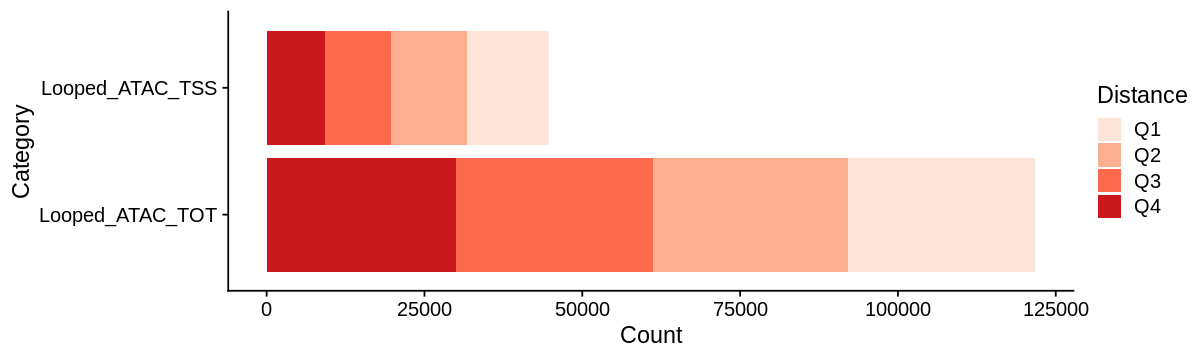

In [95]:
dat = dat_loop_count
gpt = ggplot(dat, aes(x=Count, y=Category, fill=Distance)) +
    geom_bar(stat="identity") +
    scale_fill_brewer(palette="Reds") +
    labs(x="Count", y="Category") +
    theme_cowplot()

options(repr.plot.height=3, repr.plot.width=10)
print(gpt)

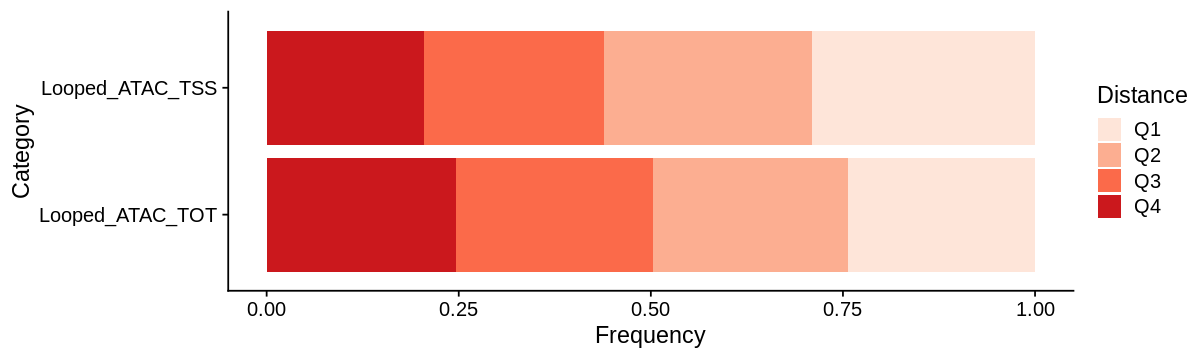

In [96]:
dat = dat_loop_count
gpt = ggplot(dat, aes(x=Freq, y=Category, fill=Distance)) +
    geom_bar(stat="identity") +
    scale_fill_brewer(palette="Reds") +
    labs(x="Frequency", y="Category") +
    theme_cowplot()

options(repr.plot.height=3, repr.plot.width=10)
print(gpt)